# Importing data

In [30]:
import pandas as pd
import numpy as np


# read feature dataset
train_seq_df = pd.read_csv("datasets/train/train_text_seq.csv")
train_seq_X = train_seq_df['input_str'].tolist()
train_seq_Y = train_seq_df['label'].tolist()

test_seq_X = pd.read_csv("datasets/test/test_text_seq.csv")['input_str'].tolist()

valid_seq_df = pd.read_csv("datasets/valid/valid_text_seq.csv")
valid_seq_X = valid_seq_df['input_str'].tolist()
valid_seq_Y = valid_seq_df['label'].tolist()


In [2]:
# !pip install tensorflow

^C


RNN

In [23]:
# import tensorflow as tf
# from tensorflow.keras import layers, models

# # Define the model architecture
# def build_rnn(input_shape, num_units=50, num_layers=3, dropout_rate=0.2, output_size=1):
#     model = models.Sequential()
    
#     # Add RNN layers
#     for i in range(num_layers):
#         if i == 0:
#             # First layer requires input shape
#             model.add(layers.SimpleRNN(units=num_units, return_sequences=True if num_layers > 1 else False,
#                                        input_shape=input_shape))
#         else:
#             # For subsequent layers
#             model.add(layers.SimpleRNN(units=num_units, return_sequences=True if i < num_layers - 1 else False))

#         # Add dropout for regularization (optional)
#         model.add(layers.Dropout(dropout_rate))

#     # Output layer (e.g., for classification or regression)
#     model.add(layers.Dense(units=output_size, activation='softmax' if output_size > 1 else 'sigmoid'))

#     # Compile the model
#     model.compile(optimizer='adam',
#                   loss='categorical_crossentropy' if output_size > 1 else 'binary_crossentropy',
#                   metrics=['accuracy'])

#     return model

# # Sample input
# input_shape = (50, 1)  # (sequence length, number of features)
# num_units = 100        # Number of RNN units
# num_layers = 1  # Number of RNN layers
# dropout_rate = 0.2     # Dropout rate to avoid overfitting
# output_size = 1        # Single output (for binary classification)

# # Build the model
# model = build_rnn(input_shape, num_units=num_units, num_layers=num_layers, 
#                   dropout_rate=dropout_rate, output_size=output_size)

# # Display model architecture
# model.summary()

# # Train the model (example)
# # X_train: training data with shape (num_samples, sequence_length, num_features)
# # y_train: corresponding labels
# # model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))



Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_11 (SimpleRNN)       │ (None, 100)            │        10,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,301 (40.24 KB)

 Trainable params: 10,301 (40.24 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
X_train = [[int(char) for char in sequence] for sequence in train_seq_X]
X_valid = [[int(char) for char in sequence] for sequence in valid_seq_X]


In [21]:
model.fit(np.array(X_train), np.array(train_seq_Y), epochs=100, batch_size=32, validation_data=(np.array(X_valid), np.array(valid_seq_Y)))

Epoch 1/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5050 - loss: 0.7298 - val_accuracy: 0.5603 - val_loss: 0.6902
Epoch 2/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4974 - loss: 0.7152 - val_accuracy: 0.5010 - val_loss: 0.6996
Epoch 3/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5251 - loss: 0.7060 - val_accuracy: 0.4724 - val_loss: 0.6987
Epoch 4/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5317 - loss: 0.6975 - val_accuracy: 0.4581 - val_loss: 0.7041
Epoch 5/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5114 - loss: 0.7008 - val_accuracy: 0.5256 - val_loss: 0.6883
Epoch 6/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5413 - loss: 0.6898 - val_accuracy: 0.5235 - val_loss: 0.6887
Epoch 7/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5432 - loss: 0.6871 - val_accuracy: 0.5419 - val_loss: 0.6825
Epoch 8/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5440 - loss: 0.6861 - val_accu

KeyboardInterrupt: 

In [31]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the model architecture
def build_rnn(input_length=50, num_units=50, num_layers=1, dropout_rate=0.2, output_size=1):
    model = models.Sequential()
    
    # Embedding layer: Input size 10 for digits 0-9, output size 8-dimensional embeddings
    model.add(layers.Embedding(input_dim=10, output_dim=10, input_length=input_length))  # For 10 unique characters
    
    # Add RNN layers
    for i in range(num_layers):
        if i == 0:
            # First RNN layer
            model.add(layers.GRU(units=num_units, return_sequences=True if num_layers > 1 else False))
        else:
            # For subsequent layers
            model.add(layers.GRU(units=num_units, return_sequences=True if i < num_layers - 1 else False))

        # Add dropout for regularization
        model.add(layers.Dropout(dropout_rate))

    # Output layer for binary classification
    model.add(layers.Dense(units=output_size, activation='sigmoid'))  # Sigmoid for binary classification

    # Compile the model
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',  # Use binary_crossentropy for binary classification
                  metrics=['accuracy'])

    return model

# Sample input parameters
input_length = 50      # Sequence length (50 characters in the string)
num_units = 50         # Number of RNN units
num_layers = 1         # Number of RNN layers
dropout_rate = 0.2     # Dropout rate to avoid overfitting
output_size = 1        # Single output (for binary classification)

# Build the model
model = build_rnn(input_length=input_length, num_units=num_units, num_layers=num_layers, 
                  dropout_rate=dropout_rate, output_size=output_size)

# Display model architecture
model.summary()
model_RNN = model

# Training (Example)
# X_train should have shape (num_samples, sequence_length)
# y_train should be binary labels (0 or 1)
# model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))


c:\Users\AADI RACIST\.conda\envs\771_env\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_5 (GRU)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.fit(np.array(X_train), np.array(train_seq_Y), epochs=100, batch_size=32, validation_data=(np.array(X_valid), np.array(valid_seq_Y)))
model.summary()

Epoch 1/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4925 - loss: 0.6936 - val_accuracy: 0.5133 - val_loss: 0.6923
Epoch 2/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5240 - loss: 0.6917 - val_accuracy: 0.5951 - val_loss: 0.6755
Epoch 3/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5804 - loss: 0.6738 - val_accuracy: 0.5787 - val_loss: 0.6570
Epoch 4/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6186 - loss: 0.6535 - val_accuracy: 0.6667 - val_loss: 0.6373
Epoch 5/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6357 - loss: 0.6430 - val_accuracy: 0.6605 - val_loss: 0.6297
Epoch 6/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6476 - loss: 0.6367 - val_accuracy: 0.6605 - val_loss: 0.6357
Epoch 7/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6570 - loss: 0.6276 - val_accuracy: 0.6830 - val_loss: 0.6201
Epoch 8/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6597 - loss: 0.6246 - val

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 50, 10)         │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_4 (GRU)                     │ (None, 50)             │         9,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,355 (110.77 KB)

 Trainable params: 9,451 (36.92 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 18,904 (73.85 KB)

CNN


In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dropout, MaxPooling1D, Flatten, Dense

In [33]:
n_timesteps, n_features, n_outputs = 50,1,1

In [74]:
def build_cnn():
    model = Sequential()
    model.add(layers.Embedding(input_dim=10, output_dim=10, input_length=input_length))  # For 10 unique characters

    model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(n_timesteps, n_features)))
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
    model.add(Dropout(0.5))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(7, activation='relu'))
    model.add(Dense(n_outputs, activation='sigmoid'))  # sigmoid for binary classification
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model


c:\Users\AADI RACIST\.conda\envs\771_env\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
c:\Users\AADI RACIST\.conda\envs\771_env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [71]:
model1.fit(np.array(X_train), np.array(train_seq_Y), epochs=100, batch_size=32, validation_data=(np.array(X_valid), np.array(valid_seq_Y)))
model1.summary()

Epoch 1/100


c:\Users\AADI RACIST\.conda\envs\771_env\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
c:\Users\AADI RACIST\.conda\envs\771_env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


222/222 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5097 - loss: 0.6931 - val_accuracy: 0.5317 - val_loss: 0.6913
Epoch 2/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5866 - loss: 0.6709 - val_accuracy: 0.6892 - val_loss: 0.6174
Epoch 3/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6588 - loss: 0.6185 - val_accuracy: 0.6748 - val_loss: 0.5953
Epoch 4/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6907 - loss: 0.5865 - val_accuracy: 0.7137 - val_loss: 0.5555
Epoch 5/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6990 - loss: 0.5647 - val_accuracy: 0.7280 - val_loss: 0.5304
Epoch 6/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7155 - loss: 0.5395 - val_accuracy: 0.7423 - val_loss: 0.5156
Epoch 7/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7380 - loss: 0.5084 - val_accuracy: 0.7566 - val_loss: 0.4836
Epoch 8/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7605 - loss: 0.4924 - val_accuracy: 0.7689

Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_17 (Embedding)        │ (None, 50, 10)         │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_30 (Conv1D)              │ (None, 48, 32)         │           992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_31 (Conv1D)              │ (None, 46, 32)         │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 46, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_15 (MaxPooling1D) │ (None, 23, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_15 (Flatten)            │ (None, 736)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 7)              │         5,159 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,091 (109.73 KB)

 Trainable params: 9,363 (36.57 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 18,728 (73.16 KB)

In [68]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Step 1: Predict on the test data (X_test)
# Model predicts probabilities, so you need to threshold these to get class labels (0 or 1)
y_pred_probs = model.predict(np.array(X_valid))

# Step 2: Convert probabilities to binary labels (use threshold 0.5)
y_pred = (y_pred_probs > 0.5).astype(int)

# Step 3: Generate confusion matrix
cm = confusion_matrix(np.array(valid_seq_Y), y_pred)
print("Confusion Matrix:\n", cm)

# Optional: Print classification report for precision, recall, F1-score
report = classification_report(np.array(valid_seq_Y), y_pred)
print("\nClassification Report:\n", report)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Confusion Matrix:
 [[234  18]
 [ 29 208]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91       252
           1       0.92      0.88      0.90       237

    accuracy                           0.90       489
   macro avg       0.91      0.90      0.90       489
weighted avg       0.90      0.90      0.90       489



In [85]:
import matplotlib.pyplot as plt
import numpy as np


def evaluate_model( train_seq_df , X_valid, valid_seq_Y):

    sizes = [0.2,0.4,0.6,0.8,1]
    train_accuracy = []
    valid_accuracy = []
    for size in sizes:
    #create random subsets of training data
        print(f"size is {size}")
        model_copy = build_cnn()
        train_seq_df_sample = train_seq_df.sample(frac=size)
        train_seq_X = train_seq_df_sample['input_str'].tolist()
        train_seq_Y = train_seq_df_sample['label'].tolist()

        X_train = [[int(char) for char in sequence] for sequence in train_seq_X]

        model_copy.fit(np.array(X_train), np.array(train_seq_Y), epochs=100, batch_size=32, validation_data=(np.array(X_valid), np.array(valid_seq_Y)))

        #return validation and training accuracies of the 2 models
        train_accuracy.append(model_copy.history.history['accuracy'][-1])
        valid_accuracy.append(model_copy.history.history['val_accuracy'][-1])


    
    plt.plot(sizes, train_accuracy, label='Training accuracy')
    plt.plot(sizes, valid_accuracy, label='Validation accuracy')
    plt.xlabel('Training data fraction')
    plt.ylabel('Accuracy')
    plt.title('Training vs Validation Accuracy')
    plt.legend()
    plt.show()

size is 0.2
Epoch 1/100


c:\Users\AADI RACIST\.conda\envs\771_env\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
c:\Users\AADI RACIST\.conda\envs\771_env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5264 - loss: 0.6932 - val_accuracy: 0.5092 - val_loss: 0.6930
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5085 - loss: 0.6927 - val_accuracy: 0.4826 - val_loss: 0.6931
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5171 - loss: 0.6914 - val_accuracy: 0.5215 - val_loss: 0.6915
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5932 - loss: 0.6847 - val_accuracy: 0.5419 - val_loss: 0.6872
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5840 - loss: 0.6755 - val_accuracy: 0.5971 - val_loss: 0.6746
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6313 - loss: 0.6505 - val_accuracy: 0.5869 - val_loss: 0.6661
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6514 - loss: 0.6159 - val_accuracy: 0.6196 - val_loss: 0.6557
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6657 - loss: 0.6049 - val_accuracy: 0.6544 - val_loss: 0.

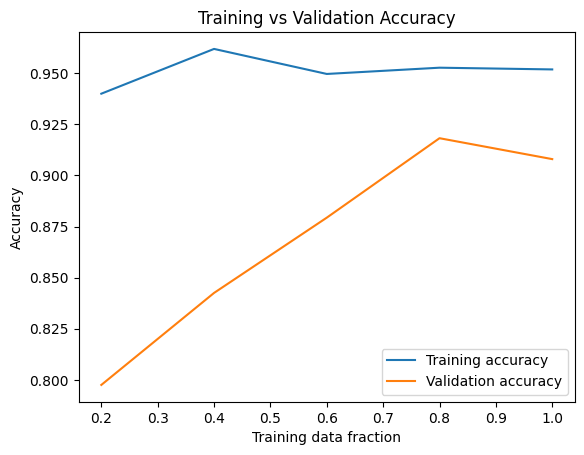

In [86]:
evaluate_model(train_seq_df, X_valid, valid_seq_Y)